In [1]:
from pycocotools.coco import COCO
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
import os
import json
import random

In [2]:
# Initialize COCO api for instance annotations
gt_coco = COCO('/home/prml/Dataset/coco2017/annotations/instances_val2017.json')
# pred_coco = COCO('/home/prml/StudentsWork/Chanyoung/MODU/result/atto/pred.json')

loading annotations into memory...
Done (t=0.47s)
creating index...
index created!


In [3]:
# Read JSON file
with open("/home/prml/StudentsWork/Chanyoung/MODU/result/atto/pred.json", 'r') as f:
    pred_atto = json.load(f)
len(pred_atto)

5000

In [4]:
# Read JSON file
with open("/home/prml/StudentsWork/Chanyoung/MODU/result/tiny/pred.json", 'r') as f:
    pred_tiny = json.load(f)
len(pred_tiny)

5000

In [5]:
# Read JSON file
with open("/home/prml/StudentsWork/Chanyoung/workspace/detection/detr/detr_0610/output/rtdetr_r18vd_6x_coco/pred.json", 'r') as f:
    pred_r18 = json.load(f)
len(pred_r18)

5000

In [6]:
# Read JSON file
with open("/home/prml/StudentsWork/Chanyoung/workspace/detection/detr/detr_0610/output/rtdetr_r50vd_6x_coco/pred.json", 'r') as f:
    pred_r50 = json.load(f)
len(pred_r50)

5000

In [7]:
pred_r50.keys()

dict_keys(['139', '285', '632', '724', '776', '785', '802', '872', '885', '1000', '1268', '1296', '1353', '1425', '1490', '1503', '1532', '1584', '1675', '1761', '1818', '1993', '2006', '2149', '2153', '2157', '2261', '2299', '2431', '2473', '2532', '2587', '2592', '2685', '2923', '3156', '3255', '3501', '3553', '3661', '3845', '3934', '4134', '4395', '4495', '4765', '4795', '5001', '5037', '5060', '5193', '5477', '5503', '5529', '5586', '5600', '5992', '6012', '6040', '6213', '6460', '6471', '6614', '6723', '6763', '6771', '6818', '6894', '6954', '7088', '7108', '7278', '7281', '7386', '7511', '7574', '7784', '7795', '7816', '7818', '7888', '7977', '7991', '8021', '8211', '8277', '8532', '8629', '8690', '8762', '8844', '8899', '9378', '9400', '9448', '9483', '9590', '9769', '9772', '9891', '9914', '10092', '10363', '10583', '10707', '10764', '10977', '10995', '11051', '11122', '11149', '11197', '11511', '11615', '11699', '11760', '11813', '12062', '12120', '12280', '12576', '12639', '

In [8]:
print(pred_r50['139']['labels'][0])
print(pred_r50['139']['boxes'][0])
print(pred_r50['139']['scores'][0])

72
[6.163325309753418, 166.10946655273438, 154.1015625, 262.09222412109375]
0.9435850381851196


In [9]:
print(pred_tiny['139']['labels'][0])
print(pred_tiny['139']['boxes'][0])
print(pred_tiny['139']['scores'][0])

72
[5.90977668762207, 165.84732055664062, 154.46397399902344, 262.08099365234375]
0.95116126537323


In [10]:
def get_pred_anns(pred, img_id, score_threshold=0.5):
    anns = []
    
    labels = pred[str(img_id)]['labels']
    bboxs = pred[str(img_id)]['boxes']
    scores = pred[str(img_id)]['scores']
    # print(labels)
    # print(bboxs)
    # print(scores)
    for label, bbox, score in zip(labels, bboxs, scores):
        if float(score) < score_threshold:
            continue
        bbox[2] -= bbox[0]
        bbox[3] -= bbox[1]
        anns.append({'category_id': int(label), 'bbox': bbox, 'score': float(score)})
    
    return anns

In [11]:
colormap = {}
for i in range(1, 81):
    hex_color_code = '#' + ''.join(random.choice('0123456789abcdef') for _ in range(6))
    colormap[i] = hex_color_code
colormap

{1: '#214834',
 2: '#415d3b',
 3: '#8ee25d',
 4: '#fd485f',
 5: '#31aab5',
 6: '#1b9ecb',
 7: '#eba2b3',
 8: '#28c35e',
 9: '#be2652',
 10: '#26c903',
 11: '#f27757',
 12: '#872445',
 13: '#314888',
 14: '#684eee',
 15: '#852e49',
 16: '#9d43fb',
 17: '#1acc4e',
 18: '#e0fe54',
 19: '#408abd',
 20: '#862101',
 21: '#646185',
 22: '#91a2e3',
 23: '#b888cd',
 24: '#26ca2d',
 25: '#5d9351',
 26: '#48b050',
 27: '#9af08b',
 28: '#3cd2a1',
 29: '#dda863',
 30: '#167cb6',
 31: '#777dfe',
 32: '#7d994e',
 33: '#4c5ba1',
 34: '#46ec97',
 35: '#f582aa',
 36: '#3082de',
 37: '#328bef',
 38: '#962935',
 39: '#67e19b',
 40: '#ffd6df',
 41: '#d232cc',
 42: '#a52387',
 43: '#307456',
 44: '#ce87f5',
 45: '#ea9935',
 46: '#f56e1e',
 47: '#06d6fb',
 48: '#389e69',
 49: '#2d56b2',
 50: '#04b8a6',
 51: '#92a484',
 52: '#ebbad1',
 53: '#942371',
 54: '#ab4b6f',
 55: '#9eb848',
 56: '#93bddf',
 57: '#b27cf9',
 58: '#ccd8f2',
 59: '#64ff97',
 60: '#12faee',
 61: '#97c559',
 62: '#cbb65f',
 63: '#25b6e9',
 

492362
1,1,41,27,28,28,31,51,58,58,51,58,1,
1,41,1,1,1,44,
1,41,1,58,58,58,58,1,58,1,28,77,27,58,
1,41,1,1,
1,41,1,1,31,1,

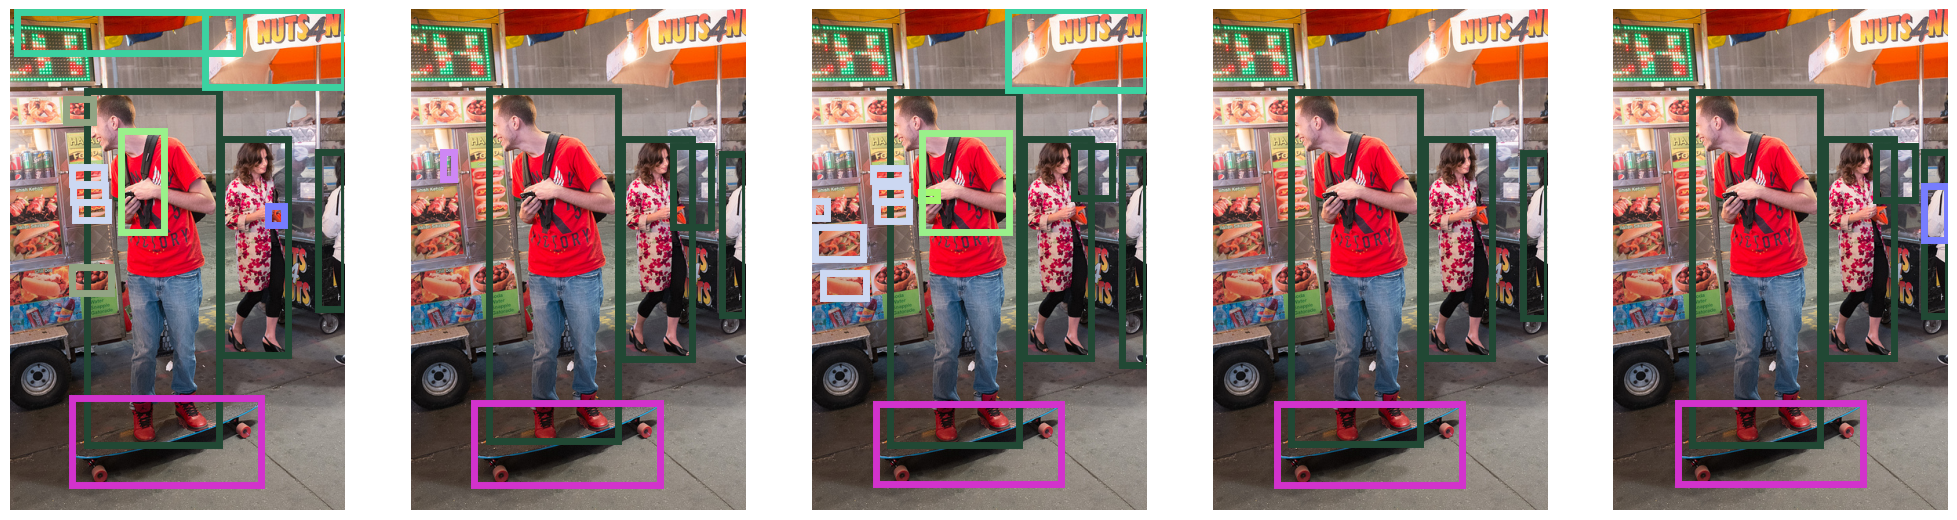

In [166]:
# Load and display a random image
catIds = gt_coco.getCatIds(catNms=['person'])
imgIds = gt_coco.getImgIds(catIds=catIds)
img = gt_coco.loadImgs(imgIds[np.random.randint(0, len(imgIds))])[0]

# Load and display image from local path
image_path = os.path.join('/home/prml/Dataset/coco2017/val2017', img['file_name'])
image = plt.imread(image_path)

# Load and display instance annotations
gt_anns = gt_coco.loadAnns(gt_coco.getAnnIds(imgIds=img['id'], iscrowd=None))
print(img['id'])

# Show annotations
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1, 5, figsize=(25, 10))
ax1.imshow(image)
for ann in gt_anns:
    bbox = ann['bbox']
    category_id = ann['category_id']
    edgecolor = colormap.get(category_id, 'r')
    print(ann['category_id'], end=',')
    rect = patches.Rectangle((bbox[0], bbox[1]), bbox[2], bbox[3], linewidth=5, edgecolor=edgecolor, facecolor='none')
    ax1.add_patch(rect)


print("")
pred_anns = get_pred_anns(pred_atto, img['id'])
ax2.imshow(image)
for ann in pred_anns:
    bbox = ann['bbox']
    category_id = ann['category_id']
    print(ann['category_id'], end=',')
    edgecolor = colormap.get(category_id, 'r')  # default to red if category_id not in color_map
    rect = patches.Rectangle((bbox[0], bbox[1]), bbox[2], bbox[3], linewidth=5, edgecolor=edgecolor, facecolor='none')
    ax2.add_patch(rect)


print("")
pred_anns = get_pred_anns(pred_tiny, img['id'])
ax3.imshow(image)
for ann in pred_anns:
    bbox = ann['bbox']
    # print(bbox, ann['score'])
    category_id = ann['category_id']
    print(ann['category_id'], end=',')
    edgecolor = colormap.get(category_id, 'r')  # default to red if category_id not in color_map
    rect = patches.Rectangle((bbox[0], bbox[1]), bbox[2], bbox[3], linewidth=5, edgecolor=edgecolor, facecolor='none')
    ax3.add_patch(rect)

print("")
pred_anns = get_pred_anns(pred_r18, img['id'])
ax4.imshow(image)
for ann in pred_anns:
    bbox = ann['bbox']
    # print(bbox, ann['score'])
    category_id = ann['category_id']
    print(ann['category_id'], end=',')
    edgecolor = colormap.get(category_id, 'r')  # default to red if category_id not in color_map
    rect = patches.Rectangle((bbox[0], bbox[1]), bbox[2], bbox[3], linewidth=5, edgecolor=edgecolor, facecolor='none')
    ax4.add_patch(rect)
    
print("")
pred_anns = get_pred_anns(pred_r50, img['id'])
ax5.imshow(image)
for ann in pred_anns:
    bbox = ann['bbox']
    # print(bbox, ann['score'])
    category_id = ann['category_id']
    print(ann['category_id'], end=',')
    edgecolor = colormap.get(category_id, 'r')  # default to red if category_id not in color_map
    rect = patches.Rectangle((bbox[0], bbox[1]), bbox[2], bbox[3], linewidth=5, edgecolor=edgecolor, facecolor='none')
    ax5.add_patch(rect)


ax1.axis('off')
ax2.axis('off')
ax3.axis('off')
ax4.axis('off')
ax5.axis('off')
plt.show()
